In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
X, y = load_boston().data, load_boston().target.reshape(-1,1)

In [4]:
# Z = Q.T * X
# Z tranformed feature matrix and Q is transformation matrix

In [5]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
pca = PCA()
fit_pca = pca.fit_transform(X)

In [10]:
fit_pca.shape

(506, 13)

In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.80582318, 0.96887514, 0.99022375, 0.99718074, 0.99848069,
       0.99920791, 0.99962696, 0.9998755 , 0.99996089, 0.9999917 ,
       0.99999835, 0.99999992, 1.        ])

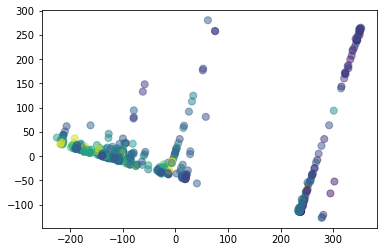

In [20]:
plt.scatter(fit_pca[:,0],fit_pca[:,1], s = 50, c = y, alpha = 0.5)

In [72]:
#without sklearn

covX = np.cov(X.T)
lambdas, Q = np.linalg.eigh(covX)

In [73]:
covX.shape

(13, 13)

In [74]:
lambdas.shape

(13,)

In [75]:
Q.shape

(13, 13)

In [76]:
idx = np.argsort(-lambdas)

In [77]:
lambdas = lambdas[idx] #sort them
lambdas = np.maximum(lambdas,0) # remove negative ones
Q = Q[:,idx]

In [78]:
Z = np.dot(X,Q)

In [79]:
Z.shape

(506, 13)

In [80]:
Z.shape

(506, 13)

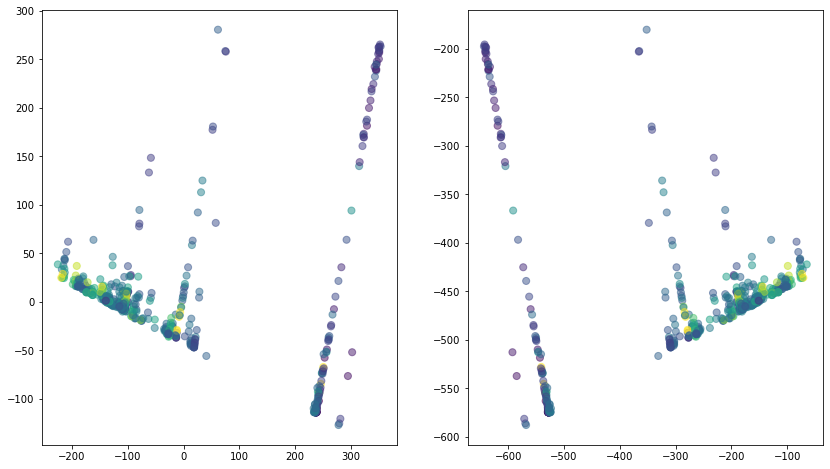

In [81]:
plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
plt.scatter(fit_pca[:,0],fit_pca[:,1], s = 50, c = y, alpha = 0.5)
plt.subplot(1,2,2)
plt.scatter(Z[:,0],Z[:,1], s = 50, c = y, alpha = 0.5)

In [82]:
np.cumsum(lambdas)

array([30889.91126082, 37140.24132222, 37958.60528062, 38225.29011829,
       38275.12164583, 38302.99843922, 38319.0618251 , 38328.5891428 ,
       38331.86247465, 38333.04341646, 38333.2985722 , 38333.35867066,
       38333.36172511])